# IMPORTING PACKAGES

In [1]:
import pandas as pd
import os
import cv2
import seaborn as sns 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import shutil
from warnings import filterwarnings
import time
from IPython.display import clear_output

# LOADING THE DATASET

In [2]:
spoiled='C:/Users/archa/Downloads/Archana capstone-2/Spoiled'
fresh='C:/Users/archa/Downloads/Archana capstone-2/Fresh'

In [3]:
df=pd.DataFrame(columns=['location','label'])

In [4]:
spoiled_data=list(map(lambda x:os.path.join(spoiled,x),os.listdir(spoiled)))
fresh_data=list(map(lambda x:os.path.join(fresh,x),os.listdir(fresh)))

In [5]:
spoiled_df=pd.DataFrame()
fresh_df=pd.DataFrame()

In [6]:
spoiled_df['location']=spoiled_data
spoiled_df['label']='spoiled'

In [7]:
fresh_df['location']=fresh_data
fresh_df['label']='fresh'

In [8]:
df=pd.concat([spoiled_df,fresh_df]).reset_index(drop=True)
print(df)

                                               location    label
0     C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
1     C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
2     C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
3     C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
4     C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
...                                                 ...      ...
1891  C:/Users/archa/Downloads/Archana capstone-2/Fr...    fresh
1892  C:/Users/archa/Downloads/Archana capstone-2/Fr...    fresh
1893  C:/Users/archa/Downloads/Archana capstone-2/Fr...    fresh
1894  C:/Users/archa/Downloads/Archana capstone-2/Fr...    fresh
1895  C:/Users/archa/Downloads/Archana capstone-2/Fr...    fresh

[1896 rows x 2 columns]


# DATA VISUALIZATION

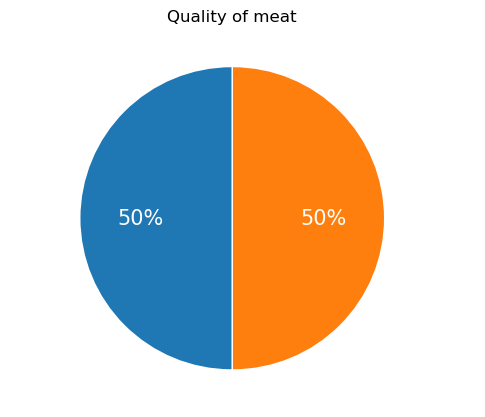

In [9]:
labels = ['Fresh','Spoiled']
sizes = [len(spoiled_df),len(fresh_df)]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,labels=labels,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.title("Quality of meat")
plt.show()

# VISUALIZING THE IMAGES OF THE MEAT

In [10]:
Fresh_Meat =fresh_df[fresh_df["label"] == "fresh"]
Spoiled_Meat =spoiled_df[spoiled_df["label"] == "spoiled"]

In [11]:
print(Fresh_Meat.head())

                                            location  label
0  C:/Users/archa/Downloads/Archana capstone-2/Fr...  fresh
1  C:/Users/archa/Downloads/Archana capstone-2/Fr...  fresh
2  C:/Users/archa/Downloads/Archana capstone-2/Fr...  fresh
3  C:/Users/archa/Downloads/Archana capstone-2/Fr...  fresh
4  C:/Users/archa/Downloads/Archana capstone-2/Fr...  fresh


In [12]:
print(Spoiled_Meat.head())

                                            location    label
0  C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
1  C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
2  C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
3  C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled
4  C:/Users/archa/Downloads/Archana capstone-2/Sp...  spoiled


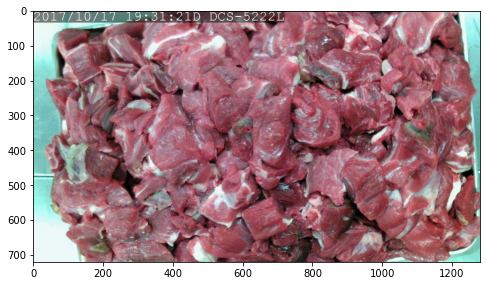

In [38]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(df['location'][15]))
plt.show()

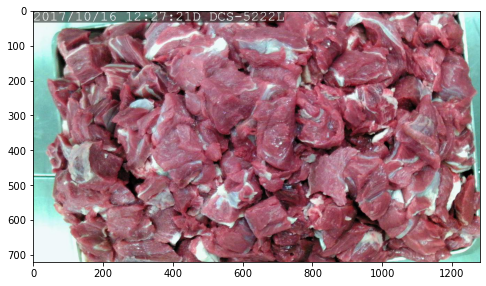

In [37]:
figure = plt.figure(figsize=(8,8))
plt.imshow(plt.imread(df['location'][1000]))
plt.show()

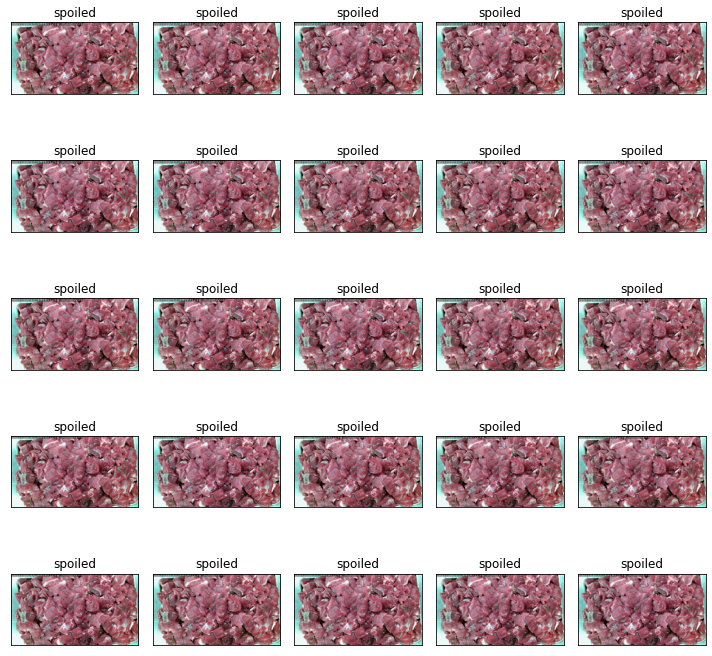

In [15]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df["location"][i]))
    ax.set_title(df["label"][i])
plt.tight_layout()
plt.show()

# DATA PREPROCESSING

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train,test=train_test_split(df,test_size=0.30)

In [18]:
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [19]:
meat_train=pd.read_csv('train.csv')
meat_test=pd.read_csv('test.csv')

In [20]:
train

,location,label
1002,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
1247,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
662,C:/Users/archa/Downloads/Archana capstone-2/Sp...,spoiled
1197,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
606,C:/Users/archa/Downloads/Archana capstone-2/Sp...,spoiled
...,...,...
330,C:/Users/archa/Downloads/Archana capstone-2/Sp...,spoiled
1639,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
1672,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
1040,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh


In [21]:
test

,location,label
1262,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
186,C:/Users/archa/Downloads/Archana capstone-2/Sp...,spoiled
784,C:/Users/archa/Downloads/Archana capstone-2/Sp...,spoiled
1867,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
1151,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
...,...,...
1278,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
1807,C:/Users/archa/Downloads/Archana capstone-2/Fr...,fresh
787,C:/Users/archa/Downloads/Archana capstone-2/Sp...,spoiled
457,C:/Users/archa/Downloads/Archana capstone-2/Sp...,spoiled


In [22]:
for file_location, label in zip(train['location'], train['label']):
    file_name = file_location.split('\\')[-1]
    target_dir = os.path.join('Train', label)
    os.makedirs(target_dir, exist_ok=True) # create directory if it doesn't exist
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(file_location, target_file)

In [23]:
for file_location, label in zip(test['location'], test['label']):
    file_name = file_location.split('\\')[-1]
    target_dir = os.path.join('Test', label)
    os.makedirs(target_dir, exist_ok=True) 
    target_file = os.path.join(target_dir, file_name)
    shutil.copy2(file_location, target_file)

## MODEL BUILDING :

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(35,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(2)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen= ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.1,
                                 horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)

In [26]:
#traning set 
train_set=train_datagen.flow_from_directory('Train',target_size=(64,64),batch_size=32,
                                           class_mode='binary')
#validation set
test_set=test_datagen.flow_from_directory('Test',target_size=(64,64),batch_size=32,
                                           class_mode='binary',shuffle=False)

Found 1732 images belonging to 2 classes.
Found 974 images belonging to 2 classes.


In [27]:
history =model.fit(train_set,
          epochs=10,validation_data=test_set,
          validation_steps=20)

Epoch 1/10
55/55 [==============================] - 34s 605ms/step - loss: 0.3789 - accuracy: 0.8303 - val_loss: 0.2343 - val_accuracy: 0.8625
Epoch 2/10
55/55 [==============================] - 24s 437ms/step - loss: 0.1411 - accuracy: 0.9411 - val_loss: 0.0989 - val_accuracy: 0.9484
Epoch 3/10
55/55 [==============================] - 25s 448ms/step - loss: 0.1060 - accuracy: 0.9550 - val_loss: 0.0881 - val_accuracy: 0.9609
Epoch 4/10
55/55 [==============================] - 24s 444ms/step - loss: 0.0800 - accuracy: 0.9654 - val_loss: 0.1342 - val_accuracy: 0.9328
Epoch 5/10
55/55 [==============================] - 24s 445ms/step - loss: 0.1126 - accuracy: 0.9503 - val_loss: 0.1193 - val_accuracy: 0.9344
Epoch 6/10
55/55 [==============================] - 24s 441ms/step - loss: 0.0787 - accuracy: 0.9665 - val_loss: 0.2416 - val_accuracy: 0.8734
Epoch 7/10
55/55 [==============================] - 24s 444ms/step - loss: 0.0721 - accuracy: 0.9706 - val_loss: 0.0735 - val_accuracy: 0.9688

In [28]:
# Evaluate the model
model.evaluate(test_set)

31/31 [==============================] - 9s 290ms/step - loss: 0.0625 - accuracy: 0.9877


[0.06252254545688629, 0.987679660320282]

In [29]:
# Visualize the results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs_range = range(10)

Text(0.5, 1.0, 'Training Accuracy')

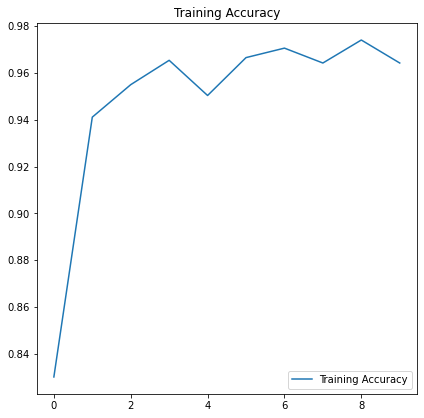

In [30]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

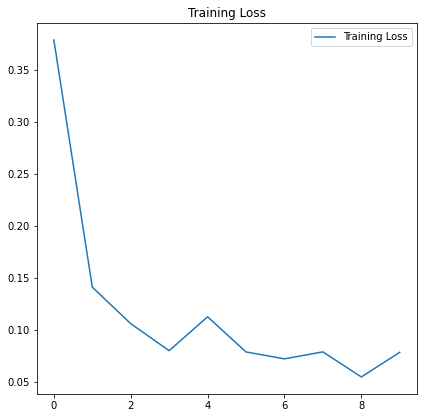

In [31]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()